In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from datetime import datetime
import statsmodels.formula.api as sm

In [2]:
train = pd.read_csv("C:/Users/anjum/Documents/bigmart/train.csv")
test = pd.read_csv("C:/Users/anjum/Documents/bigmart/test.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


# Data Preprocessing

In [21]:
train.isnull().values.any()

False

In [ ]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))

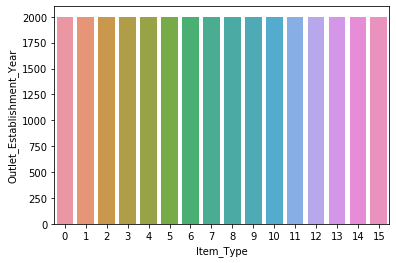

In [22]:
sns.barplot(x='Item_Type', y='Outlet_Establishment_Year', data=train)

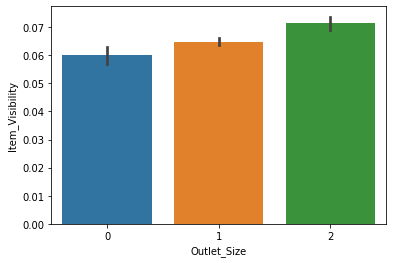

In [23]:
sns.barplot(x='Outlet_Size', y='Item_Visibility', data=train)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
lb = LabelEncoder()
one = OneHotEncoder()

In [14]:
train["Item_Type"] = lb.fit_transform(train["Item_Type"] )
train["Item_Fat_Content"] = lb.fit_transform(train["Item_Fat_Content"] )
train["Outlet_Location_Type"] = lb.fit_transform(train["Outlet_Location_Type"] )
train["Outlet_Type"] = lb.fit_transform(train["Outlet_Type"] )
train["Outlet_Size"] = lb.fit_transform(train["Outlet_Size"] )


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Outlet_Establishment_Year'),
 Text(0.5, 1.0, 'Box Plot On Outlet_Establishment_Year')]

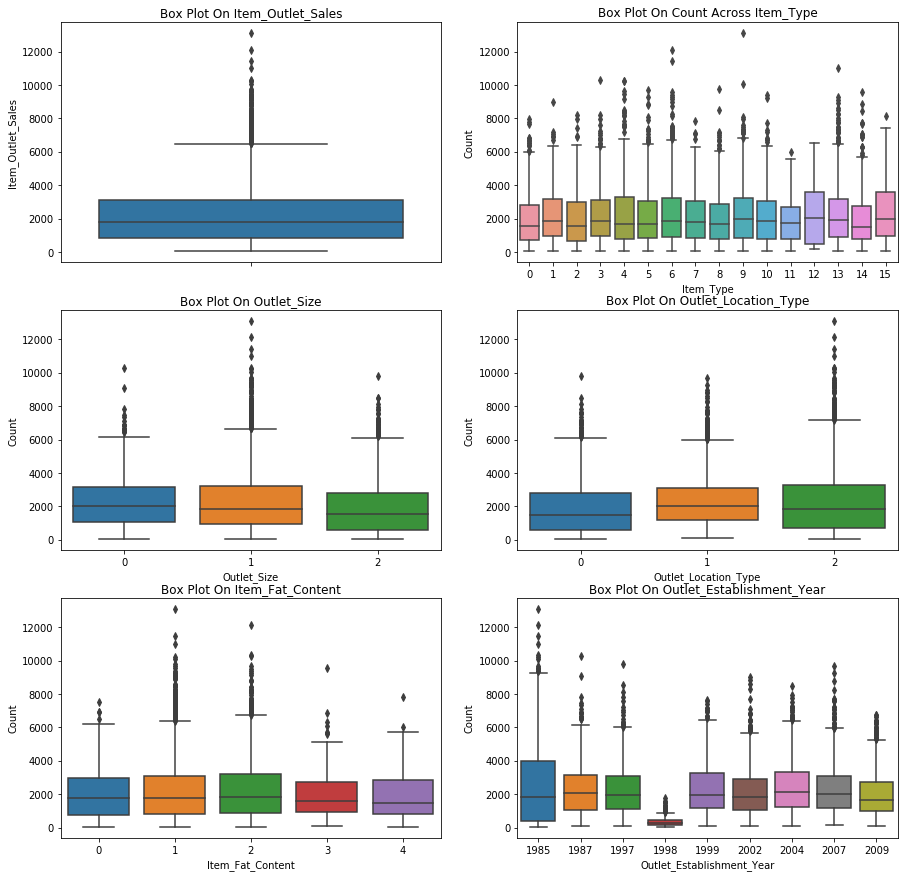

In [24]:
#Box plot
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train,y="Item_Outlet_Sales",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="Item_Outlet_Sales",x="Item_Type",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="Item_Outlet_Sales",x="Outlet_Size",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="Item_Outlet_Sales",x="Outlet_Location_Type",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="Item_Outlet_Sales",x="Item_Fat_Content",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="Item_Outlet_Sales",x="Outlet_Establishment_Year",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Item_Outlet_Sales',title="Box Plot On Item_Outlet_Sales")
axes[0][1].set(xlabel='Item_Type', ylabel='Count',title="Box Plot On Count Across Item_Type")
axes[1][0].set(xlabel='Outlet_Size', ylabel='Count',title="Box Plot On Outlet_Size")
axes[1][1].set(xlabel='Outlet_Location_Type', ylabel='Count',title="Box Plot On Outlet_Location_Type")
axes[2][0].set(xlabel='Item_Fat_Content', ylabel='Count',title="Box Plot On Item_Fat_Content")
axes[2][1].set(xlabel='Outlet_Establishment_Year', ylabel='Count',title="Box Plot On Outlet_Establishment_Year")

In [25]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017103,-0.017843,0.028041,0.025258,0.035689,-0.016294,-0.001756,-0.026358,0.006443
Item_Fat_Content,-0.017103,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.017843,0.034042,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028041,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.025258,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.035689,-0.000189,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.016294,-0.012058,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,-0.001756,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.026358,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.006443,0.009800,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


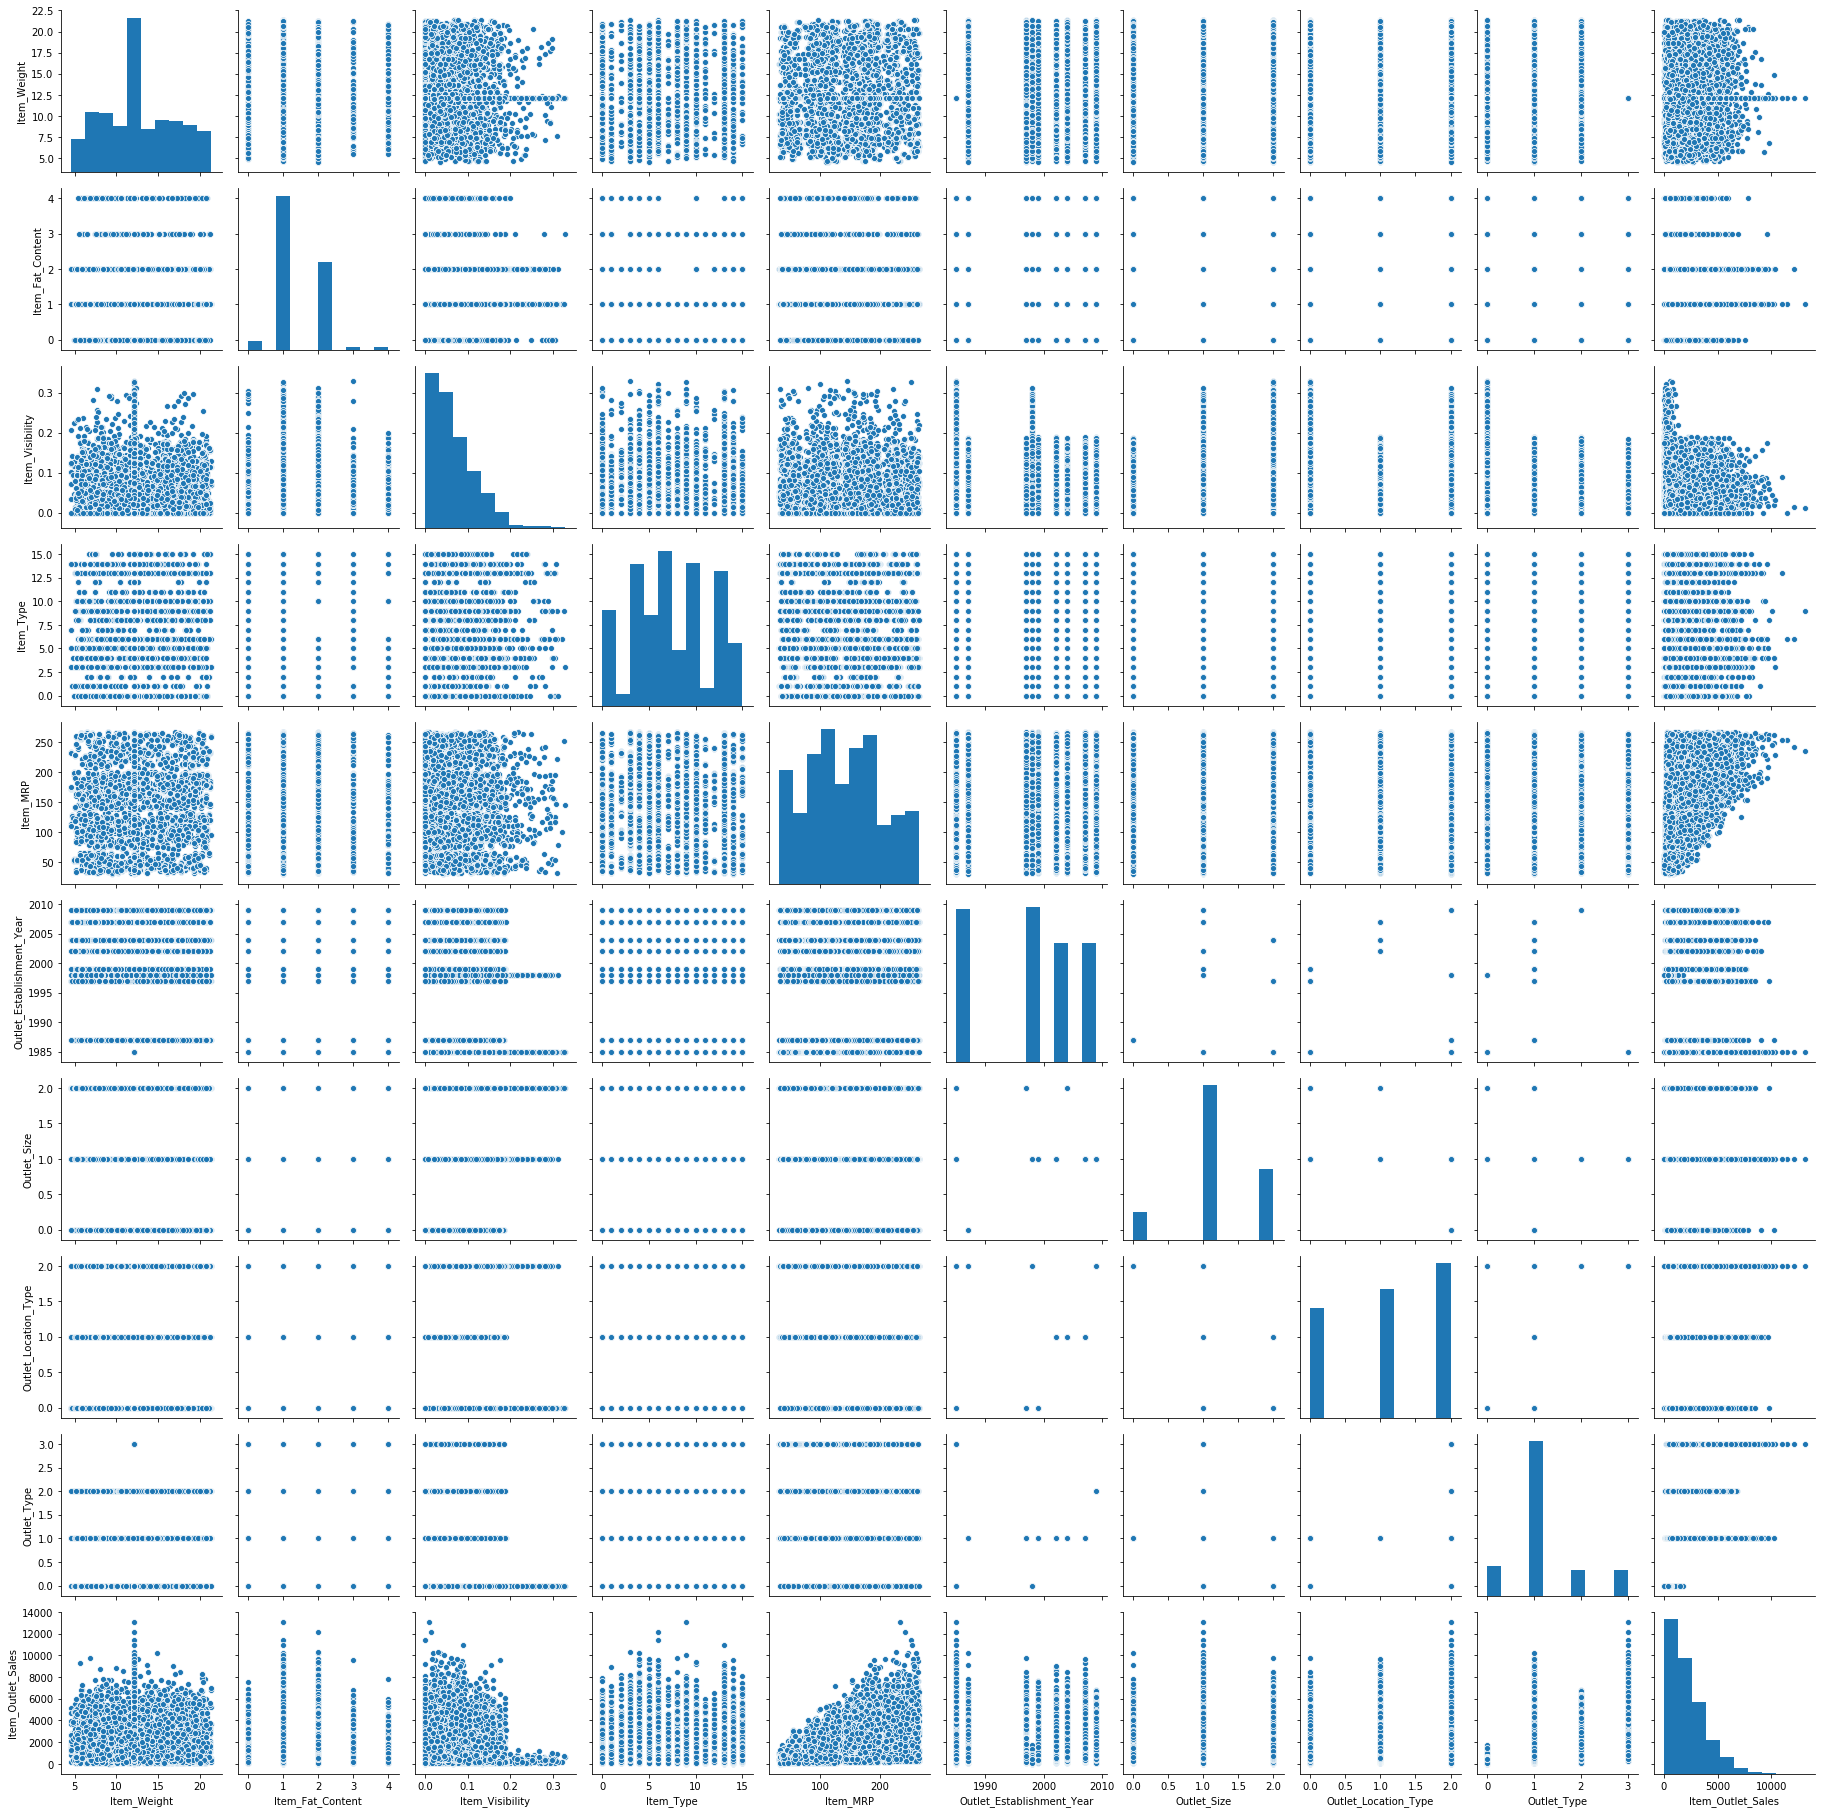

In [26]:
sns.pairplot(train)

# Applying Machine Learning Models


In [30]:
X = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [32]:
Y = train['Item_Outlet_Sales']

In [34]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()

In [41]:
X = scl.fit_transform(X)

In [43]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [44]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.256
RMSLE test: 0.575
R2 train: 0.940
R2 test: 0.551


In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# grid search hyperparameters for ridge regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# evaluate the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(forest, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE: -1283161.587 (78607.075)


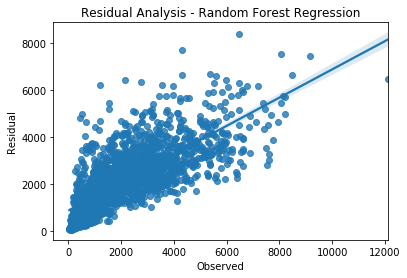

In [48]:
sns.regplot(y_test,y_test_pred)
plt.title('Residual Analysis - Random Forest Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
model1 = GradientBoostingRegressor()

In [51]:
# fit the model on the whole dataset
model1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model1, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE: -1170172.274 (92325.602)


In [56]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [57]:
test1 = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [61]:
test1.isnull().values.any()

False

In [60]:
test1 = test1.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [63]:
test1["Item_Type"] = lb.fit_transform(test1["Item_Type"] )
test1["Item_Fat_Content"] = lb.fit_transform(test1["Item_Fat_Content"] )
test1["Outlet_Location_Type"] = lb.fit_transform(test1["Outlet_Location_Type"] )
test1["Outlet_Type"] = lb.fit_transform(test1["Outlet_Type"] )
test1["Outlet_Size"] = lb.fit_transform(test1["Outlet_Size"] )

In [64]:
test1 = scl.fit_transform(test1)

In [65]:
test1.shape

(5681, 9)

In [66]:
test_pred = forest.predict(test1)


In [72]:
test_pred= pd.DataFrame(test_pred)

In [73]:
final = pd.concat([test.Item_Identifier,test.Outlet_Identifier,test_pred],axis=1)

In [74]:
final

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1651.668370
1,FDW14,OUT017,1471.422994
2,NCN55,OUT010,710.731513
3,FDQ58,OUT017,2355.042792
4,FDY38,OUT027,6580.420984
...,...,...,...
5676,FDB58,OUT046,2332.933239
5677,FDD47,OUT018,2686.269970
5678,NCO17,OUT045,1844.618874
5679,FDJ26,OUT017,4893.115670
